In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rt_reviews.csv', encoding='latin1')
data.head()

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...


In [ ]:
data['Freshness']=data['Freshness'].replace(['fresh','rotten'],[1,0])

In [ ]:
data['Freshness']

0         1
1         1
2         0
3         0
4         0
         ..
479995    0
479996    1
479997    0
479998    1
479999    1
Name: Freshness, Length: 480000, dtype: int64

In [ ]:
data.shape

(480000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 0 to 479999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Freshness  480000 non-null  int64 
 1   Review     480000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.3+ MB


In [ ]:
X=data['Review']
y=data['Freshness']

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer()
#Tokenizer(oov_token='<nothing>') oove_token mean if a word does not present in training data and this word apear in test data,
# then the word will be replaced with this value
tokenizer.fit_on_texts(X)
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'that': 9,
 'but': 10,
 'as': 11,
 'with': 12,
 'this': 13,
 'for': 14,
 'film': 15,
 "it's": 16,
 'an': 17,
 'its': 18,
 'movie': 19,
 'on': 20,
 'be': 21,
 'you': 22,
 'not': 23,
 'one': 24,
 'by': 25,
 'at': 26,
 'more': 27,
 'are': 28,
 'from': 29,
 'like': 30,
 'all': 31,
 'about': 32,
 'than': 33,
 'has': 34,
 'his': 35,
 'have': 36,
 'so': 37,
 'if': 38,
 'or': 39,
 'i': 40,
 'story': 41,
 'up': 42,
 'just': 43,
 'out': 44,
 'what': 45,
 'into': 46,
 'much': 47,
 'too': 48,
 'even': 49,
 'most': 50,
 'good': 51,
 'who': 52,
 'will': 53,
 'some': 54,
 'no': 55,
 'time': 56,
 'can': 57,
 'comedy': 58,
 'there': 59,
 'their': 60,
 'only': 61,
 'which': 62,
 'make': 63,
 'well': 64,
 'when': 65,
 'full': 66,
 'director': 67,
 'was': 68,
 'way': 69,
 'best': 70,
 'never': 71,
 "doesn't": 72,
 'little': 73,
 'he': 74,
 'while': 75,
 'been': 76,
 'action': 77,
 'characters': 78,
 'enough': 79,
 'they': 80

In [ ]:
tokenizer.word_counts

OrderedDict([('manakamana', 6),
             ("doesn't", 14287),
             ('answer', 679),
             ('any', 12234),
             ('questions', 1549),
             ('yet', 7874),
             ('makes', 11694),
             ('its', 63116),
             ('point', 4777),
             ('nepal', 3),
             ('like', 36123),
             ('the', 548136),
             ('rest', 1747),
             ('of', 312249),
             ('our', 5643),
             ('planet', 637),
             ('is', 191094),
             ('a', 378513),
             ('picturesque', 93),
             ('but', 94337),
             ('far', 7383),
             ('from', 36453),
             ('peaceable', 5),
             ('kingdom', 376),
             ('wilfully', 33),
             ('offensive', 657),
             ('and', 319149),
             ('powered', 178),
             ('by', 39537),
             ('chest', 164),
             ('thumping', 95),
             ('machismo', 107),
             ("it's", 66859),
      

In [ ]:
sequences=tokenizer.texts_to_sequences(X)
sequences[0:7]

[[37284,
  72,
  1648,
  86,
  738,
  153,
  89,
  18,
  246,
  49749,
  30,
  1,
  663,
  4,
  207,
  1748,
  6,
  2,
  8511,
  10,
  161,
  29,
  40289,
  2809],
 [16272, 1698, 3, 5253, 25, 2, 5588, 8381, 7685, 10, 16, 51, 2918, 106],
 [8, 92, 21, 654, 5, 873, 265, 27, 498, 14, 16530, 33, 382, 461],
 [195,
  1,
  5218,
  18,
  233,
  664,
  5,
  1,
  391,
  16,
  158,
  5,
  517,
  9101,
  20,
  32847,
  6170,
  4,
  2740],
 [38,
  59,
  68,
  2,
  51,
  341,
  26,
  1,
  918,
  4,
  13,
  15,
  16,
  76,
  2399,
  7,
  17,
  29789,
  2925,
  4,
  11732,
  361,
  1024,
  5200,
  125,
  7113,
  3,
  2,
  823,
  2926,
  40290,
  138],
 [7445,
  280,
  1,
  4334,
  2879,
  4517,
  15007,
  17,
  3013,
  2239,
  1146,
  7,
  1,
  56,
  2490,
  4793],
 [8,
  68,
  1,
  6263,
  4,
  586,
  7,
  7583,
  263,
  11,
  771,
  10,
  8766,
  1326,
  3,
  1443,
  1154,
  415,
  5,
  7980,
  636,
  7980,
  636,
  16856,
  8,
  1152,
  7,
  1,
  3664,
  16531,
  767]]

In [ ]:
from keras.utils import pad_sequences
sequences=pad_sequences(sequences,padding='post')


In [ ]:
from keras import Sequential
from keras.layers import Dense,Flatten,Embedding,SimpleRNN

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(sequences,y,random_state=5)

In [ ]:
sequences

array([[37284,    72,  1648, ...,     0,     0,     0],
       [16272,  1698,     3, ...,     0,     0,     0],
       [    8,    92,    21, ...,     0,     0,     0],
       ...,
       [   15,  3699,   388, ...,     0,     0,     0],
       [   17,   984,   153, ...,     0,     0,     0],
       [   55,   147,   476, ...,     0,     0,     0]], dtype=int32)

In [ ]:
len(sequences[0])

55

In [ ]:
model=Sequential()
model.add(Embedding(5000000,2))
model.add(SimpleRNN(32,input_shape=(55,1),return_sequences=False))
model.add(Dense(16))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           10000000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,001,665
Trainable params: 10,001,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=500)

Epoch 1/5
720/720 [==============================] - 102s 137ms/step - loss: 0.5161 - accuracy: 0.7309 - val_loss: 0.4362 - val_accuracy: 0.8009
Epoch 2/5
720/720 [==============================] - 49s 69ms/step - loss: 0.3782 - accuracy: 0.8354 - val_loss: 0.3955 - val_accuracy: 0.8229
Epoch 3/5
720/720 [==============================] - 44s 61ms/step - loss: 0.3369 - accuracy: 0.8557 - val_loss: 0.3899 - val_accuracy: 0.8280
Epoch 4/5
720/720 [==============================] - 42s 58ms/step - loss: 0.3117 - accuracy: 0.8676 - val_loss: 0.3920 - val_accuracy: 0.8301
Epoch 5/5
720/720 [==============================] - 42s 58ms/step - loss: 0.2920 - accuracy: 0.8774 - val_loss: 0.3866 - val_accuracy: 0.8311


In [ ]:
import numpy as np
# input_data=np.array(X_test[100])

y_predict=model.predict(X_test)

3750/3750 [==============================] - 25s 7ms/step


In [ ]:
def replace_values(value):
  if value<0.50:
    return 0
  else:
    return 1


In [ ]:
y_predict=pd.DataFrame(y_predict)
y_predict.columns=['ypredict']
y_predict['ypredict']=y_predict['ypredict'].apply(replace_values)
y_predict['ypredict'][0:10]

0    1
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: ypredict, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

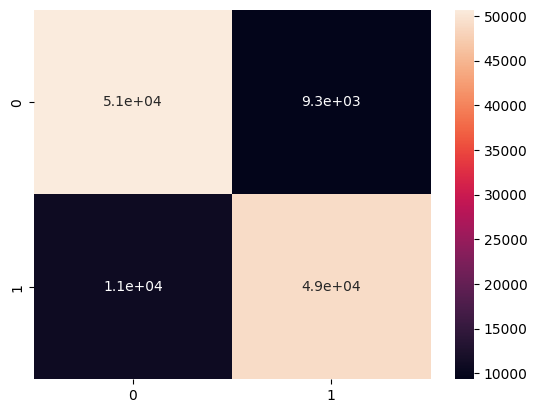

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
